## Librairies

In [16]:
import matplotlib
%matplotlib inline

import pandas as pd

## Create DataFrame

In [18]:
df_prix = pd.read_csv('datas/Prix_Petrole_Brut.csv')
df_production = pd.read_csv('datas/Production_Petrole_Brut.csv')
df_approvisionnement = pd.read_csv('datas/Approvisionnement_Energie_Primaire.csv')
df_energie_renouvelable = pd.read_csv('datas/Energies_Renouvelables.csv')

df = pd.DataFrame()

## Join Approvisionnement and production

In [31]:
df = df_approvisionnement.join(df_production,lsuffix='_approvisionnement', rsuffix='_production')

In [32]:
df = df.rename(index=str,columns = {"TIME_approvisionnement" : "TIME"})

In [33]:
del df['TIME_production']

In [34]:
df = df.rename(columns = {"LOCATION_approvisionnement":"LOCATION"})
df = df.rename(columns = {"FREQUENCY_production":"FREQUENCY"})

In [35]:
del df['LOCATION_production']
del df['FREQUENCY_approvisionnement']

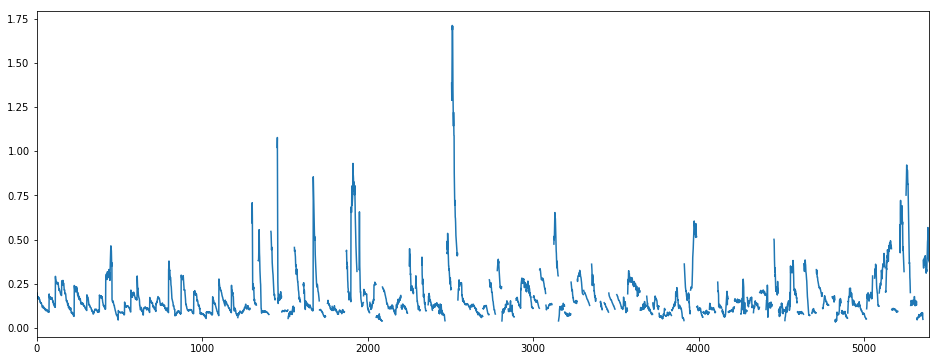

In [36]:
df['Value_approvisionnement'].plot(figsize=(16,6))

## Join Prix Petrole Brut

In [37]:
df = pd.merge(df, df_prix[['LOCATION', 'Value','TIME']], on=['LOCATION','TIME'],how='left')

In [38]:
df = df.rename(columns = {"Value":"Value_prix"})

## Join Energies Renouvelables

In [39]:
df = pd.merge(df, df_energie_renouvelable[['LOCATION', 'Value','TIME']], on=['LOCATION','TIME'],how='left')

In [40]:
df = df.rename(columns={"Value":"Value_renouvelable"})

In [41]:
df = df.set_index('TIME')

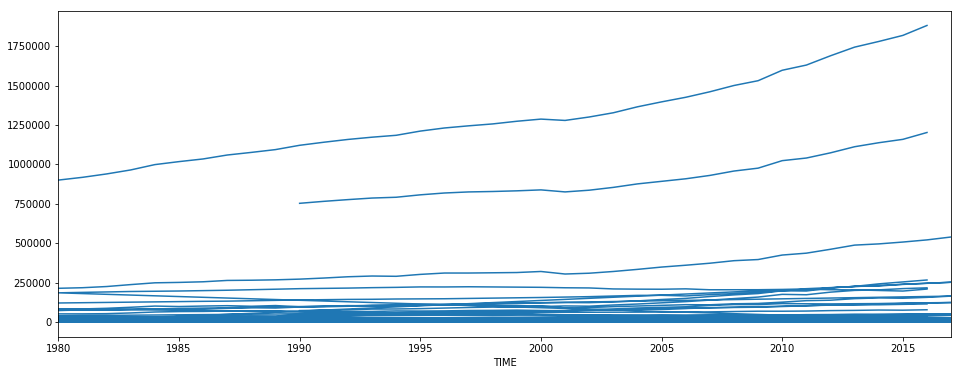

In [42]:
df['Value_renouvelable'].plot(figsize=(16,6))

## Exports final file to csv

In [43]:
df.to_csv('datas/df_final.csv')

## additional tools